# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math
%matplotlib notebook

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

$x_{0} = 0$

$y_{0} = 0$

$\frac{dx}{dt}_{0} = 300cos(50°)$

$\frac{dy}{dt}_{0} = 300sin(50°)$

$m = 7.8\cdot\frac{4}{3}\pi (\frac{15}{2})^3$

$v_{x} = \frac{dx}{dt}$

$v_{y} = \frac{dy}{dt}$

$\frac{dv_{x}}{dt} = 0$

$\frac{dv_{y}}{dt} = -9.81m$

Code the equations into a function 

In [2]:
x0 = 0 #m
y0 = 0 #m
vx0 = 300*math.cos(math.radians(50)) #m/s
vy0 = 300*math.sin(math.radians(50)) #m/s
m = (1/1000)*7.8*(4/3)*math.pi*(15/2)**3 #kg
def proj_vac(t,init,m):
    '''t: time step (s)
       init: array of initial conditions [x,y,vx,vy]'''
    if (init[1] < 0):
        return np.array([0,0,0,0])
    return np.array([init[2],init[3],0,-9.81*m])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [3]:
t0 = 0
tf = 3.5
points = 1000
no_air = integrate.solve_ivp(proj_vac,(t0,tf),np.array([x0,y0,vx0,vy0]), t_eval=np.linspace(t0,tf,points), args=(m,))

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


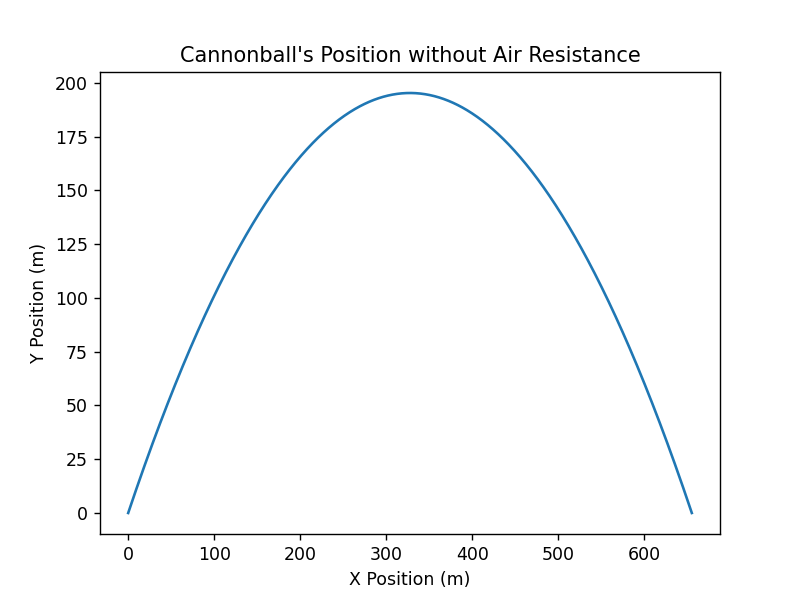

The horizontal range is 655.4777983889174 meters.


In [4]:
plt.plot(no_air.y[0],no_air.y[1])
plt.title('Cannonball\'s Position without Air Resistance')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
print("The horizontal range is {} meters.".format(no_air.y[0][-1]))

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [5]:
def runge_kutta_4(func, init, t, args=()):
    n = len(t)
    vals = np.zeros((n,len(init)))
    vals[0] = init
    for i in range(0,n-1):
        dt = t[i+1]-t[i]
        k1 = func(t[i],vals[i],*args)
        k2 = func(t[i]+(dt/2),vals[i]+((dt/2)*k1),*args)
        k3 = func(t[i]+(dt/2),vals[i]+((dt/2)*k2),*args)
        k4 = func(t[i]+dt,vals[i]+(dt*k3),*args)
        vals[i+1] = vals[i] + ((dt/6)*(k1+(2*k2)+(2*k3)+k4))
    return vals

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

<IPython.core.display.Javascript object>


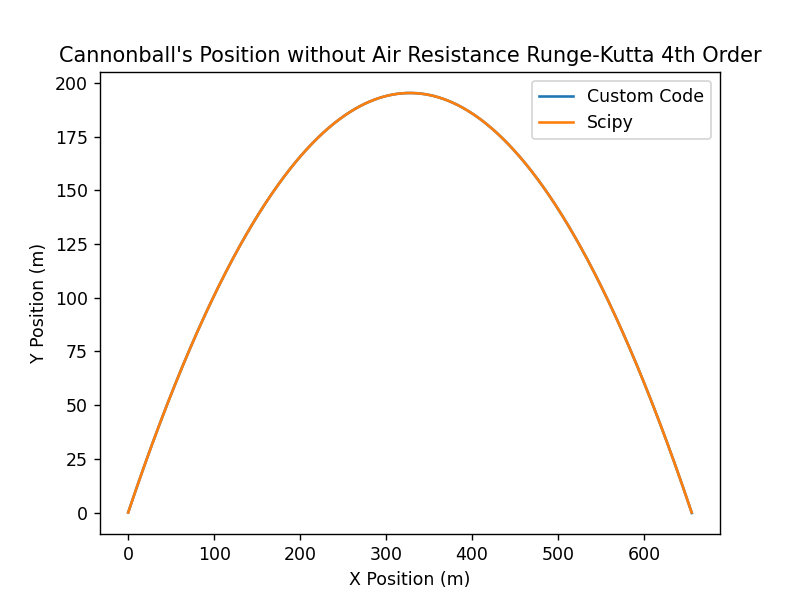

They are the same


In [6]:
plt.figure()
custom = runge_kutta_4(proj_vac,np.array([x0,y0,vx0,vy0]),np.linspace(t0,tf,points),args=(m,))
plt.plot(custom[:,0],custom[:,1])
plt.plot(no_air.y[0],no_air.y[1])
plt.title('Cannonball\'s Position without Air Resistance Runge-Kutta 4th Order')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend(['Custom Code','Scipy'])
print('They are the same')

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$x_{0} = 0$

$y_{0} = 0$

$\frac{dx}{dt}_{0} = 300cos(50°)$

$\frac{dy}{dt}_{0} = 300sin(50°)$

$m = 7.8\cdot\frac{4}{3}\pi (\frac{15}{2})^3$

$v_{x} = \frac{dx}{dt}$

$v_{y} = \frac{dy}{dt}$

$\frac{dv_{x}}{dt} = -f$

$\frac{dv_{y}}{dt} = -9.81m-f$

drag force $f = 0.005625v^2$

Code the equations into a function

In [7]:
x0 = 0 #m
y0 = 0 #m
vx0 = 300*math.cos(math.radians(50)) #m/s
vy0 = 300*math.sin(math.radians(50)) #m/s
m = (1/1000)*7.8*(4/3)*math.pi*(15/2)**3 #kg
def drag_force(v):
    return 0.005625*v**2
def proj_vac(t,init,m):
    '''t: time step (s)
       init: array of initial conditions [x,y,vx,vy]'''
    if (init[1] < 0):
        return np.array([0,0,0,0])
    return np.array([init[2],init[3],-drag_force(init[2]),(-9.81*m)-drag_force(init[3])])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [8]:
t0 = 0
tf = 3.5
points = 1000
no_press_var = integrate.solve_ivp(proj_vac,(t0,tf),np.array([x0,y0,vx0,vy0]), t_eval=np.linspace(t0,tf,points), args=(m,))

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


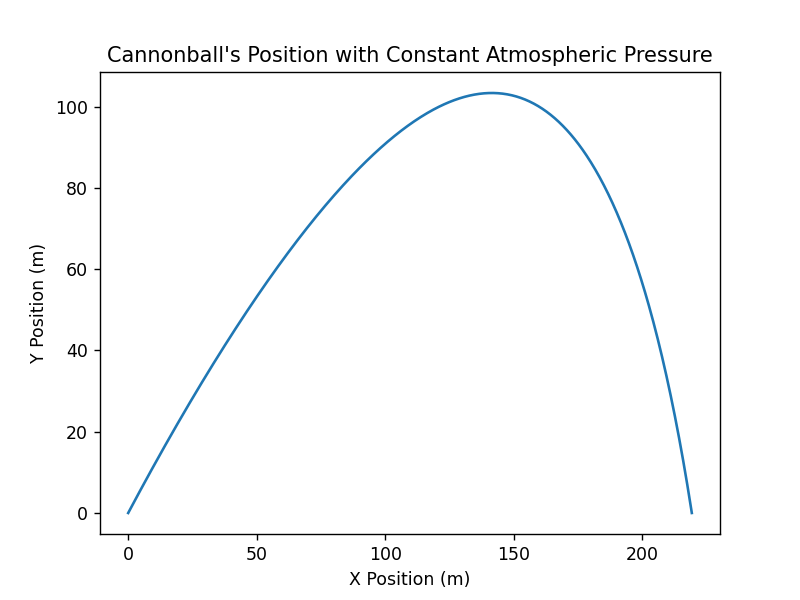

The horizontal range is 219.24567312812735 meters.


In [9]:
plt.figure()
plt.plot(no_press_var.y[0],no_press_var.y[1])
plt.title('Cannonball\'s Position with Constant Atmospheric Pressure')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
print("The horizontal range is {} meters.".format(no_press_var.y[0][-1]))

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$x_{0} = 0$

$y_{0} = 0$

$\frac{dx}{dt}_{0} = 300cos(50°)$

$\frac{dy}{dt}_{0} = 300sin(50°)$

$m = 7.8\cdot\frac{4}{3}\pi (\frac{15}{2})^3$

$v_{x} = \frac{dx}{dt}$

$v_{y} = \frac{dy}{dt}$

$\frac{dv_{x}}{dt} = -f$

$\frac{dv_{y}}{dt} = -9.81m-f$

drag force $f = 0.005625 exp(\frac{-y}{10000})v^2$

Code the equations into a function

In [10]:
x0 = 0 #m
y0 = 0 #m
vx0 = 300*math.cos(math.radians(50)) #m/s
vy0 = 300*math.sin(math.radians(50)) #m/s
m = (1/1000)*7.8*(4/3)*math.pi*(15/2)**3 #kg
def drag_force(y,v):
    return 0.005625*np.exp(-y/10000)*v**2
def proj_vac(t,init,m):
    '''t: time step (s)
       init: array of initial conditions [x,y,vx,vy]'''
    if (init[1] < 0):
        return np.array([0,0,0,0])
    return np.array([init[2],init[3],-drag_force(init[1],init[2]),(-9.81*m)-drag_force(init[1],init[3])])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [11]:
t0 = 0
tf = 3.5
points = 1000
complete = integrate.solve_ivp(proj_vac,(t0,tf),np.array([x0,y0,vx0,vy0]), t_eval=np.linspace(t0,tf,points), args=(m,))

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


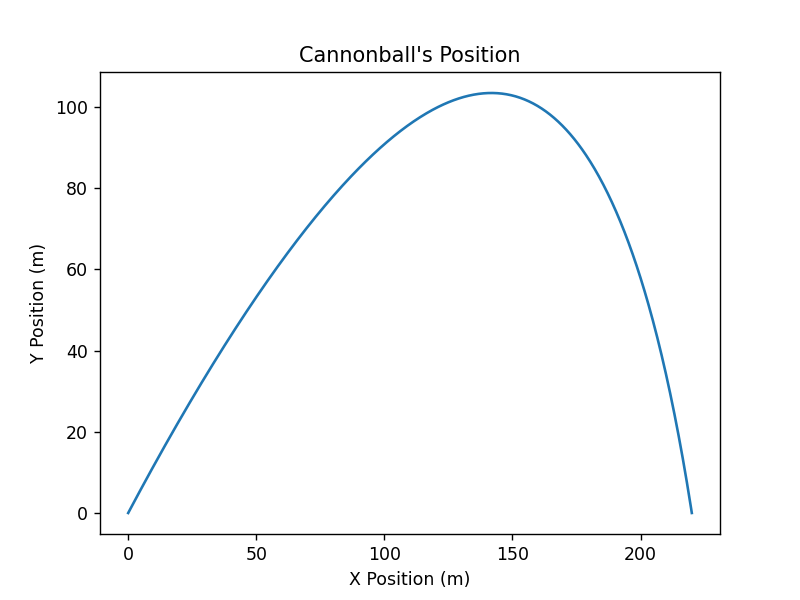

The horizontal range is 220.0021923394938 meters.


In [12]:
plt.figure()
plt.plot(complete.y[0],complete.y[1])
plt.title('Cannonball\'s Position')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
print("The horizontal range is {} meters.".format(complete.y[0][-1]))

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


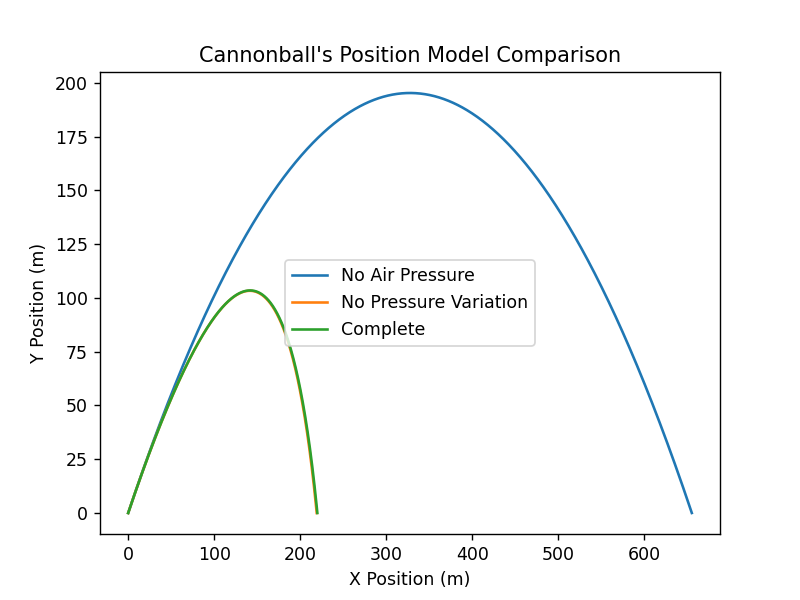

In [13]:
plt.figure()
plt.plot(no_air.y[0],no_air.y[1])
plt.plot(no_press_var.y[0],no_press_var.y[1])
plt.plot(complete.y[0],complete.y[1])
plt.title('Cannonball\'s Position Model Comparison')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend(['No Air Pressure', 'No Pressure Variation', 'Complete']);

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

Adding air resistance made a much larger difference as seen in the graph above.